![NLP](https://pbs.twimg.com/media/FgeSxwyXEAEnSO1?format=jpg&name=medium)

<b> Problem Statement: </b>
* Food Computing Field of Research
* Our Project's goal:
    * detection of recipe ingredients inside of collected comments
    * preparing a dataset of recipes with 18k+ real users comments

![NLP](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import the Recipes Review Dataset  </font>
We gathered our data from the well known cooking recipe website tasteofhome.com, we downloaded the ingredients and comments left on the list of 100 most popular recipes presented by the site. We used the Selenium library to scrape the list of ingredients from each of the html pages. As for the comments, we found and used the hidden backend api used by the site, which avoided the trouble of loading all the comments on the html page, and gave us some additional data that would be otherwise difficult to scrape. <br>
In total we obtained 100 lists of ingredients and 18182 comments, gathered in two csv files. The comment data, besides the text and related recipe id, also values such as the review score given by the comment, the number of upvotes and downvotes, the number of replies to the comment, and other metrics that could potentially be useful during model training.

![NLP](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>1.1.1: Check Working Directory </font>

In [1]:
import os
os.getcwd()

'C:\\Users\\amira\\Data Science\\Semester 3\\NLP\\Source Code'

#### <font color = blue>1.1.2: Import the Libraries

In [2]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.text import Text
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.style.use("fivethirtyeight")

#### <font color = blue>1.1.3: Load the Dataset

In [6]:
df1 = pd.read_csv('Dataset/recipes_review.csv')
df2 = pd.read_csv('Dataset/recipes_ingredients.csv', sep = '\t')

In [16]:
df1["text"][76]

'This was hands down the most delicious white chili I have ever had! I did not add tortilla chips and only used 1 can of the green chili’s and it was perfect!'

In [5]:
df2.shape[0]

100

In [4]:
df2["Ingredients"]

0     1 pound boneless skinless chicken breasts, cut...
1     1-3/4 cups all-purpose flour;1-1/2 cups sugar;...
2     1/2 pound ground beef;4 tablespoons butter, di...
3     1 pound sliced bacon, diced;1 medium sweet oni...
4     3/4 cup butter, softened;2-1/2 cups sugar;3 la...
                            ...                        
95    1/2 cup plus 2 tablespoons quick-cooking oats;...
96    1-1/2 pounds boneless skinless chicken breast ...
97    2 tablespoons butter;1/2 pound sliced fresh mu...
98    1 tablespoon sesame oil;1/2 pound ground pork;...
99    1 package white cake mix (regular size);1 pack...
Name: Ingredients, Length: 100, dtype: object

In [6]:
with open('NLPPP.txt', 'w') as f:
    for i in range(df2.shape[0]):
        f.write('\n')
        f.write(df2["Ingredients"][i])

#### <font color = blue>1.1.4: Merge both the DataFrames

In [6]:
df = pd.merge(df1, df2, on = 'Recipe')
df.head(5)

Unnamed: 0  recipe_number  recipe_code              Recipe  \
0           0              1        14299  Creamy White Chili   
1           1              1        14299  Creamy White Chili   
2           2              1        14299  Creamy White Chili   
3           3              1        14299  Creamy White Chili   
4           4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation  created_at  reply_count  thumbs_up  \
0     Jeri326                1  1665619889            0          0   
1     Mark467               50  1665277687            0          7   
2  Barbara566               10  1664404557            0          3   
3  jeansch123                1  1661787808            2          2   
4    camper77               10  1664913823            1          7   

   thumbs_down  stars  best_score  \
0            0      5         527   
1            0      5         724   
2            0      5         710   
3            0      0         581   
4            0      0         820   

                                                text  \
0  I tweaked it a little, removed onions because ...   
1  Bush used to have a white chili bean and it ma...   
2  I have a very complicated white chicken chili ...   
3  In your introduction, you mentioned cream chee...   
4  Wonderful! I made this for a &#34;Chili/Stew&#...   

                                         Ingredients  
0  1 pound boneless skinless chicken breasts, cut...  
1  1 pound boneless skinless chicken breasts, cut...  
2  1 pound boneless skinless chicken breasts, cut...  
3  1 pound boneless skinless chicken breasts, cut...  
4  1 pound boneless skinless chicken breasts, cut...

![NLP](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Exploratory Data Analysis </font>

![NLP](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Size of Data

In [7]:
df.size

286608

####  <font color = blue> How many numbers of observations and features</font>

In [8]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 17913
Number of Features: 16


####  <font color = blue> Features that we have in this data</font>

In [11]:
df.columns

Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'Recipe', 'comment_id',
       'user_id', 'user_name', 'user_reputation', 'created_at', 'reply_count',
       'thumbs_up', 'thumbs_down', 'stars', 'best_score', 'text',
       'Ingredients'],
      dtype='object')

####  <font color = blue> Type of Data </font>

In [12]:
df.dtypes

Unnamed: 0          int64
recipe_number       int64
recipe_code         int64
Recipe             object
comment_id         object
user_id            object
user_name          object
user_reputation     int64
created_at          int64
reply_count         int64
thumbs_up           int64
thumbs_down         int64
stars               int64
best_score          int64
text               object
Ingredients        object
dtype: object

#### <font color = blue> Data Info</font>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17913 entries, 0 to 17912
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       17913 non-null  int64 
 1   recipe_number    17913 non-null  int64 
 2   recipe_code      17913 non-null  int64 
 3   Recipe           17913 non-null  object
 4   comment_id       17913 non-null  object
 5   user_id          17913 non-null  object
 6   user_name        17913 non-null  object
 7   user_reputation  17913 non-null  int64 
 8   created_at       17913 non-null  int64 
 9   reply_count      17913 non-null  int64 
 10  thumbs_up        17913 non-null  int64 
 11  thumbs_down      17913 non-null  int64 
 12  stars            17913 non-null  int64 
 13  best_score       17913 non-null  int64 
 14  text             17911 non-null  object
 15  Ingredients      17913 non-null  object
dtypes: int64(10), object(6)
memory usage: 2.3+ MB


#### <font color = blue> Recipes Distribution</font>

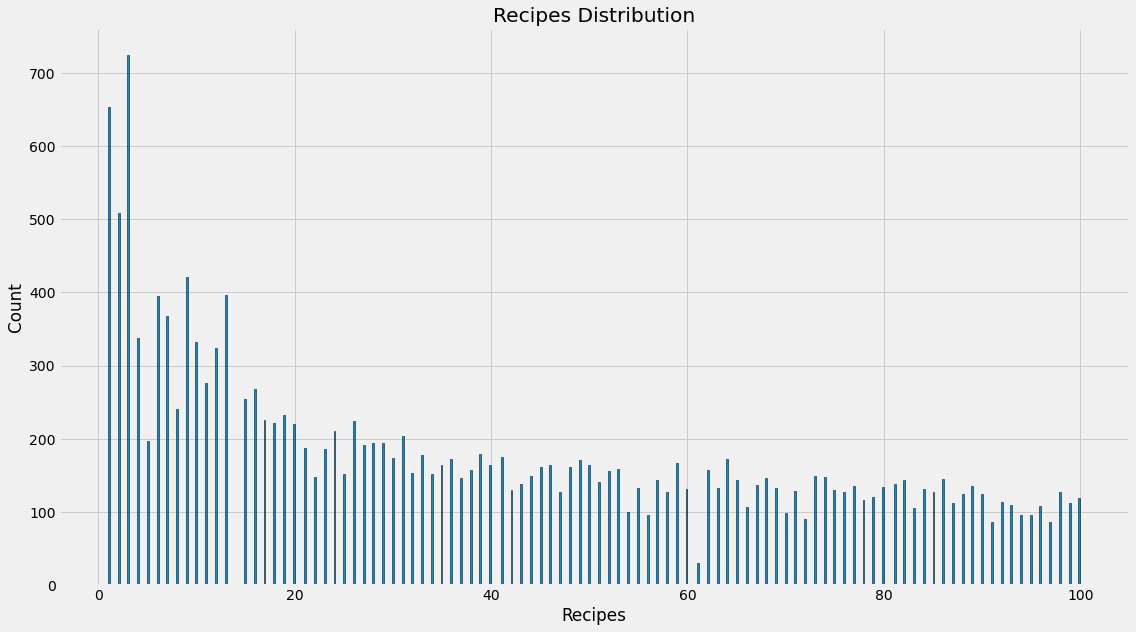

In [14]:
plt.figure(figsize = (16, 9))
bins_ = [10, 20, 30, 40, 50, 60]

plt.hist(df['recipe_number'] , bins = 500, edgecolor = 'black')

plt.title('Recipes Distribution')
plt.xlabel('Recipes')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### <font color = blue> Reviews Length Distribution </font>

In [15]:
df.text = df.text.astype(str)

In [16]:
df['review_len'] = df["text"].apply(lambda x: len(x))

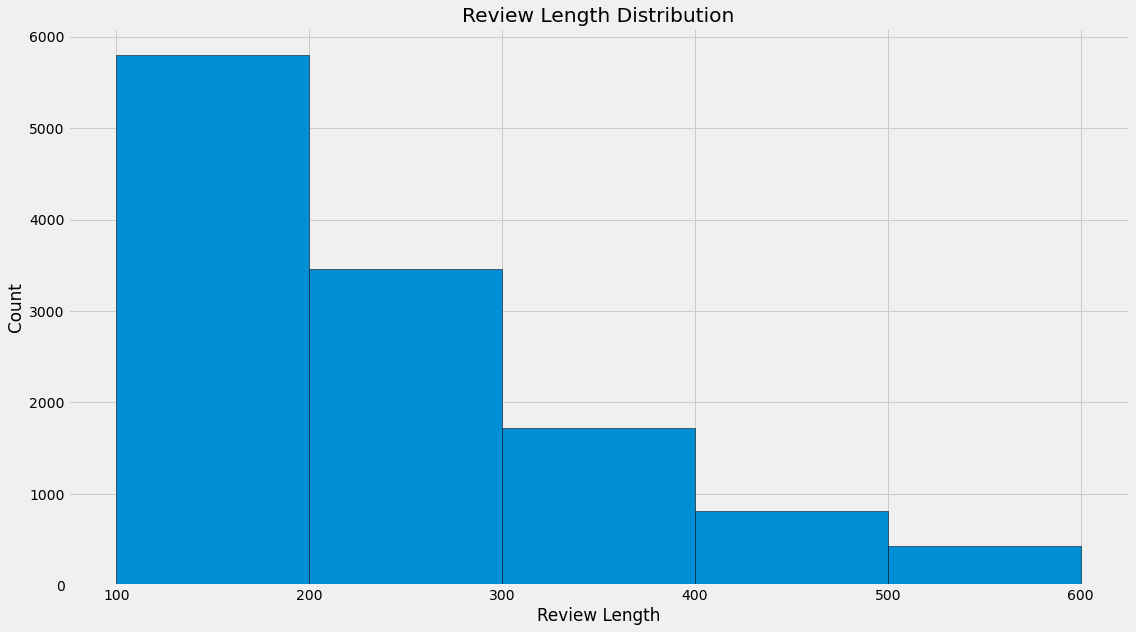

In [17]:
plt.figure(figsize = (16, 9))
bins_ = [100, 200, 300, 400, 500, 600]
plt.hist(df['review_len'], bins = bins_, edgecolor = 'black')

plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### <font color = blue> Word Count Distribution </font>

In [18]:
df['word_count'] = df["text"].apply(lambda x: len(x.split()))

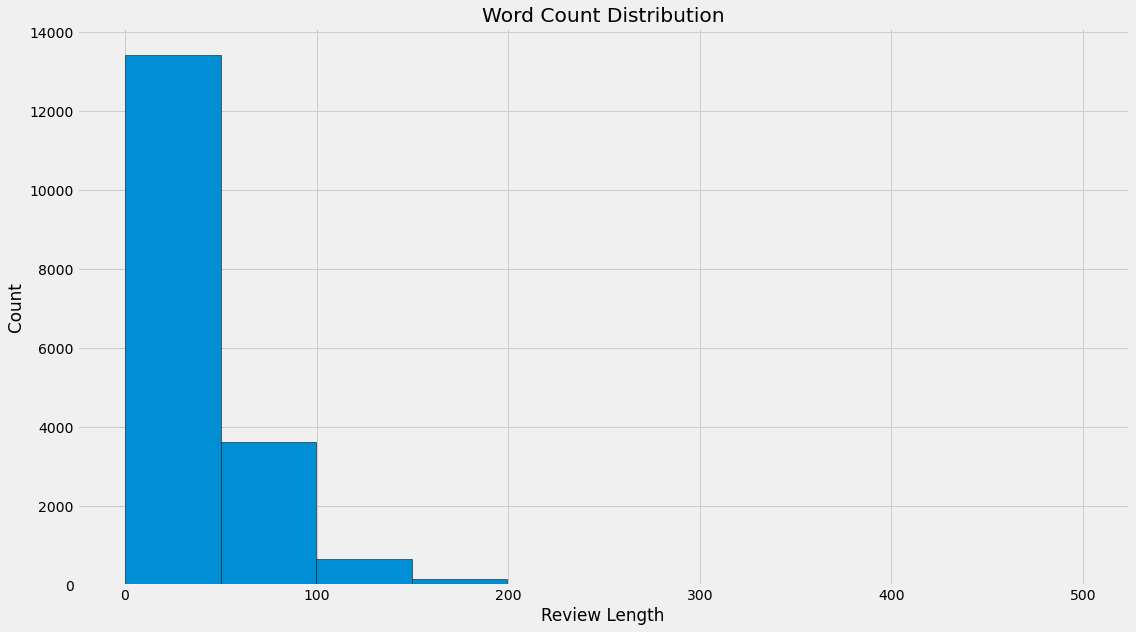

In [19]:
plt.figure(figsize = (16, 9))

plt.hist(df['word_count'], edgecolor = 'black')

plt.title('Word Count Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count') 

plt.tight_layout()
plt.show()

#### <font color = blue> Review Rating Distribution </font>

<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='stars'>

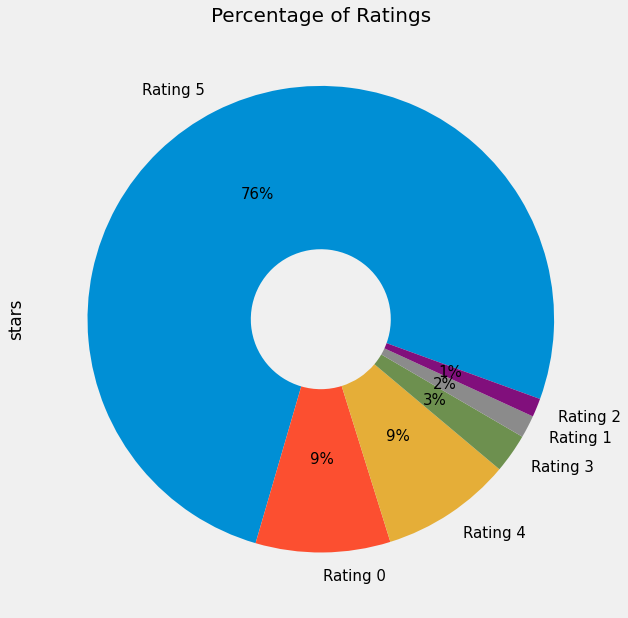

In [20]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.stars.value_counts().plot(kind='pie', labels=['Rating 5', 'Rating 0', 'Rating 4', 'Rating 3', 'Rating 1', 'Rating 2'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

#### <font color = blue> Sentiment Polarity Distribution </font>

In [21]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

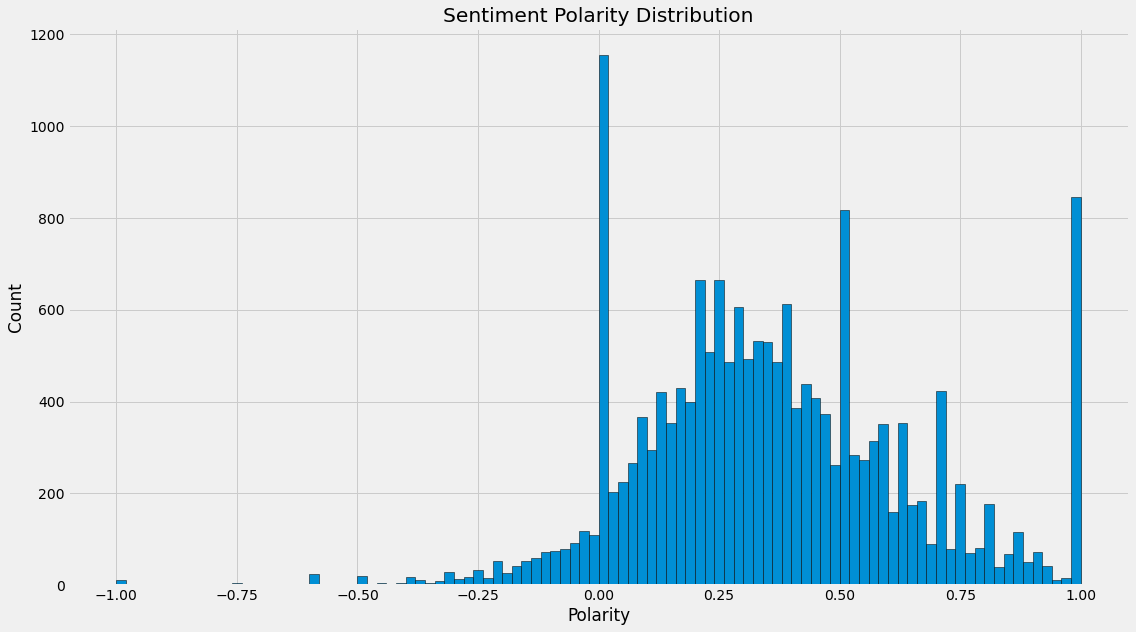

In [22]:
plt.figure(figsize = (16, 9))

plt.hist(df['polarity'], bins = 100, edgecolor = 'black')

plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### <font color = blue> Wordcloud of Recipes Review </font>

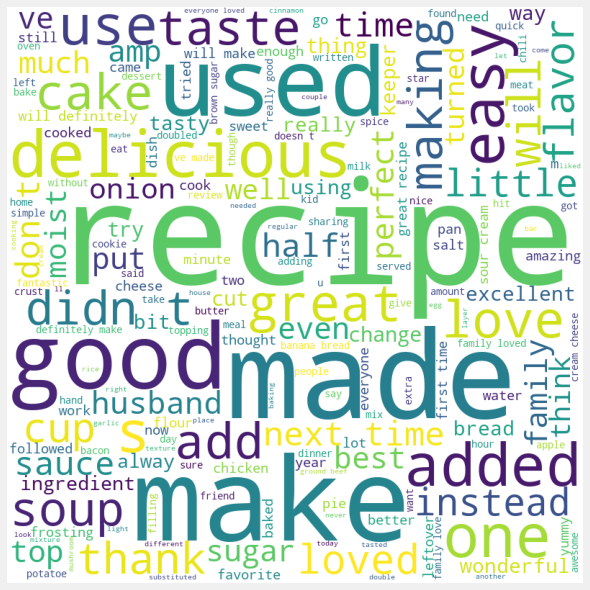

In [23]:
recipes_review = df.iloc[:, 14:15]
comment_words = ''
stopwords = set(STOPWORDS)
for val in recipes_review .text:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

![NLP Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Data Preprocessing </font>
In this part, we did data preprocessing. firstly, we did text cleaning with the help of Regular Expression and then we apply preprocessing operations like Tokenization to make a token of each sentence, then remove stop words like "the", "a", "at" etc and then apply stemming to reducing a word to its word stem.

![NLP](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Text Cleaning </font>
> <b>Lowercase <br> Remove Punctuation <br> Remove Special Characters </b>

#### <font color = blue>3.1.1: Lower Case

In [24]:
def lower_case(text):
    return text.lower()

df['text'] = df['text'].apply(lower_case)

#### <font color = blue>3.1.2: Remove Punctuation

In [25]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['text'] = df['text'].apply(remove_punct)

#### <font color = blue>3.1.3: Remove Special Characters

In [26]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['text'] = df['text'].apply(remove_special)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.2: </font> <font color = #41EA46>  Preprocessing Operations </font>
> <b>Tokenizing <br> Removing Stop Words <br> Lemmatization <b>

#### <font color = blue>3.2.1: Tokenizing

In [23]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [24]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df['text'] = df['text'].apply(tokenize)

#### <font color = blue>3.2.2: Removing StopWords

In [25]:
from nltk.corpus import stopwords

In [26]:
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text

df['text'] = df['text'].apply(remove_stop)

#### <font color = blue>3.2.3: Lemmatization

In [27]:
from nltk.stem import WordNetLemmatizer

In [28]:
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text = [word_lem.lemmatize(token) for token in text]
    return text

df['text'] = df['text'].apply(Lemmatize)

![NLP Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> System Architecture </font>

![NLP](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [25]:
" ".join(df["text"].tolist())

'I tweaked it a little, removed onions because of onion haters in my house, used Italian seasoning instead of just oregano, and use a paprika/ cayenne mix and a little more than the recipe called for.. we like everything a bit more hot. The chili was amazing! It was easy to make and everyone absolutely loved it. It will now be a staple meal in our house. Bush used to have a white chili bean and it made this recipe super simple. I’ve written to them and asked them to please!, bring them back I have a very complicated white chicken chili recipe that I have made for years. Everyone raves over it. I saw this recipe and thought I’d try it as an easy alternative for weeknights. My husband likes this recipe better! Super easy and delicious! I did cut back slightly on the crushed oregano and cayenne pepper, otherwise I made it exactly as written. In your introduction, you mentioned cream cheese but there is none listed in the ingredients! Wonderful! I made this for a &#34;Chili/Stew&#34; night

In [3]:
import pandas as pd
import json
import os

with open("annotations.json", "r") as f:
    data = json.load(f)

In [4]:
data

{'classes': ['INGREDIENTS'],
 'annotations': [['1 pound boneless skinless chicken breasts, cut into 1/2-inch cubes;1 medium onion, chopped;1-1/2 teaspoons garlic powder;1 tablespoon canola oil;2 cans (15-1/2 ounces each) great northern beans, rinsed and drained;1 can (14-1/2 ounces) chicken broth;2 cans (4 ounces each) chopped green chiles;1 teaspoon salt;1 teaspoon ground cumin;1 teaspoon dried oregano;1/2 teaspoon pepper;1/4 teaspoon cayenne pepper;1 cup sour cream;1/2 cup heavy whipping cream;Optional: Tortilla chips, shredded cheddar cheese, sliced seeded jalapeno pepper\r',
   {'entities': [[26, 33, 'INGREDIENTS'],
     [34, 41, 'INGREDIENTS'],
     [76, 81, 'INGREDIENTS'],
     [107, 113, 'INGREDIENTS'],
     [134, 144, 'INGREDIENTS'],
     [188, 193, 'INGREDIENTS'],
     [281, 293, 'INGREDIENTS'],
     [305, 309, 'INGREDIENTS'],
     [328, 333, 'INGREDIENTS'],
     [351, 358, 'INGREDIENTS'],
     [372, 378, 'INGREDIENTS'],
     [400, 406, 'INGREDIENTS'],
     [418, 423, 'INGREDI

In [5]:
entity_name = "AIRCRAFT"

train_data = data["annotations"]
train_data = [tuple(i) for i in train_data]

In [6]:
for i in train_data:
    if i[1]['entities'] == []:
        i[1]["entities"] = (0, 0, entity_name)
    else:
        i[1]["entities"][0] = tuple(i[1]["entities"][0])

In [2]:
import pandas as pd
import os
from tqdm import tqdm
import spacy
from spacy.tokens import DocBin

In [8]:
nlp = spacy.blank("en") # load a new spacy model
#nlp = spacy.load("en_core_web_sm") # load other spacy mode

NameError: name 'spacy' is not defined

In [6]:
db = DocBin() # create a DocBin object

In [8]:
for text, annot in tqdm(train_data): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

 50%|████████████████████████████████████████████████████████████████▌                                                               | 52/103 [00:00<00:00, 285.65it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 278.55it/s]


Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skippin

In [9]:
db.to_disk("./train.spacy")

In [3]:
custom_spacy_model = spacy.load("model-best")

In [ ]:
nlp_ne

In [18]:
doc = custom_spacy_model("This was hands down the most delicious white chili I have ever had! I did not add tortilla chips and only used 1 can of the green chili and it was perfect!'")
spacy.displacy.render(doc, style="ent", jupyter=True)

In [12]:
import spacy
#from spacy.gold import GoldParse
from spacy.scorer import Scorer

In [13]:
from spacy.tokens import Doc
from spacy.training.example import Example

In [14]:
def evaluate(ner_model, examples):
    scorer = Scorer()
    example = []
    for input_, annot in examples:
        pred = ner_model(input_)
        print(pred,annot)
        temp = Example.from_dict(pred, dict.fromkeys(annot))
        example.append(temp)
    scores = scorer.score(example)
    return scores

In [15]:
train_data

[('1 pound boneless skinless chicken breasts, cut into 1/2-inch cubes;1 medium onion, chopped;1-1/2 teaspoons garlic powder;1 tablespoon canola oil;2 cans (15-1/2 ounces each) great northern beans, rinsed and drained;1 can (14-1/2 ounces) chicken broth;2 cans (4 ounces each) chopped green chiles;1 teaspoon salt;1 teaspoon ground cumin;1 teaspoon dried oregano;1/2 teaspoon pepper;1/4 teaspoon cayenne pepper;1 cup sour cream;1/2 cup heavy whipping cream;Optional: Tortilla chips, shredded cheddar cheese, sliced seeded jalapeno pepper\r',
  {'entities': [(26, 33, 'INGREDIENTS'),
    [34, 41, 'INGREDIENTS'],
    [76, 81, 'INGREDIENTS'],
    [107, 113, 'INGREDIENTS'],
    [134, 144, 'INGREDIENTS'],
    [188, 193, 'INGREDIENTS'],
    [281, 293, 'INGREDIENTS'],
    [305, 309, 'INGREDIENTS'],
    [328, 333, 'INGREDIENTS'],
    [351, 358, 'INGREDIENTS'],
    [372, 378, 'INGREDIENTS'],
    [400, 406, 'INGREDIENTS'],
    [418, 423, 'INGREDIENTS'],
    [463, 471, 'INGREDIENTS'],
    [496, 502, 'ING

In [16]:
results = evaluate(nlp_ner, train_data)
print(results)

 {'entities': [(26, 33, 'INGREDIENTS'), [34, 41, 'INGREDIENTS'], [76, 81, 'INGREDIENTS'], [107, 113, 'INGREDIENTS'], [134, 144, 'INGREDIENTS'], [188, 193, 'INGREDIENTS'], [281, 293, 'INGREDIENTS'], [305, 309, 'INGREDIENTS'], [328, 333, 'INGREDIENTS'], [351, 358, 'INGREDIENTS'], [372, 378, 'INGREDIENTS'], [400, 406, 'INGREDIENTS'], [418, 423, 'INGREDIENTS'], [463, 471, 'INGREDIENTS'], [496, 502, 'INGREDIENTS'], [518, 526, 'INGREDIENTS'], [527, 533, 'INGREDIENTS']]}
 {'entities': [(23, 28, 'INGREDIENTS'), [40, 45, 'INGREDIENTS'], [64, 68, 'INGREDIENTS'], [82, 86, 'INGREDIENTS'], [95, 99, 'INGREDIENTS'], [132, 139, 'INGREDIENTS'], [164, 174, 'INGREDIENTS'], [201, 211, 'INGREDIENTS'], [223, 230, 'INGREDIENTS'], [253, 260, 'INGREDIENTS']]}
 {'entities': [(17, 21, 'INGREDIENTS'), [36, 42, 'INGREDIENTS'], [68, 73, 'INGREDIENTS'], [91, 98, 'INGREDIENTS'], [113, 119, 'INGREDIENTS'], [137, 142, 'INGREDIENTS'], [160, 167, 'INGREDIENTS'], [216, 224, 'INGREDIENTS'], [232, 239, 'INGREDIENTS'], [266,

 {'entities': [(8, 11, 'INGREDIENTS'), [26, 30, 'INGREDIENTS'], [54, 60, 'INGREDIENTS'], [104, 109, 'INGREDIENTS'], [123, 127, 'INGREDIENTS'], [143, 147, 'INGREDIENTS'], [156, 163, 'INGREDIENTS'], [179, 190, 'INGREDIENTS'], [216, 223, 'INGREDIENTS']]}
 {'entities': [(25, 32, 'INGREDIENTS'), [65, 70, 'INGREDIENTS'], [82, 88, 'INGREDIENTS'], [147, 154, 'INGREDIENTS'], [172, 177, 'INGREDIENTS'], [206, 214, 'INGREDIENTS'], [260, 266, 'INGREDIENTS'], [310, 317, 'INGREDIENTS'], [412, 418, 'INGREDIENTS'], [432, 442, 'INGREDIENTS'], [468, 474, 'INGREDIENTS']]}aby spinach, coarsely chopped;2-1/4 teaspoons minced fresh basil or 3/4 teaspoon dried basil;1/4 teaspoon pepper;Dash crushed red pepper flakes;Shredded Parmesan cheese, optional
 {'entities': [(16, 21, 'INGREDIENTS'), [44, 54, 'INGREDIENTS'], [55, 59, 'INGREDIENTS'], [60, 67, 'INGREDIENTS'], [103, 109, 'INGREDIENTS'], [184, 190, 'INGREDIENTS']]};1 reduced-fat graham cracker crust (9 inches)
 {'entities': [(16, 20, 'INGREDIENTS'), [28, 33

 {'entities': [(8, 14, 'INGREDIENTS'), [33, 38, 'INGREDIENTS'], [47, 51, 'INGREDIENTS'], [81, 86, 'INGREDIENTS'], [112, 128, 'INGREDIENTS'], [144, 148, 'INGREDIENTS'], [184, 188, 'INGREDIENTS'], [220, 231, 'INGREDIENTS'], [232, 236, 'INGREDIENTS']]}
 {'entities': [(14, 23, 'INGREDIENTS'), [33, 38, 'INGREDIENTS'], [63, 76, 'INGREDIENTS'], [88, 101, 'INGREDIENTS'], [134, 145, 'INGREDIENTS'], [195, 202, 'INGREDIENTS'], [231, 239, 'INGREDIENTS'], [258, 265, 'INGREDIENTS'], [296, 302, 'INGREDIENTS'], [321, 328, 'INGREDIENTS'], [329, 335, 'INGREDIENTS'], [348, 360, 'INGREDIENTS'], [412, 419, 'INGREDIENTS'], [433, 437, 'INGREDIENTS'], [470, 482, 'INGREDIENTS']]}
 {'entities': [(14, 20, 'INGREDIENTS'), [47, 52, 'INGREDIENTS'], [69, 73, 'INGREDIENTS'], [87, 93, 'INGREDIENTS'], [104, 108, 'INGREDIENTS'], [115, 138, 'INGREDIENTS'], [167, 175, 'INGREDIENTS'], [209, 214, 'INGREDIENTS'], [226, 232, 'INGREDIENTS']]}
 {'entities': [(20, 25, 'INGREDIENTS'), [34, 37, 'INGREDIENTS'], [60, 64, 'INGREDIENT

 {'entities': [(8, 14, 'INGREDIENTS'), [29, 34, 'INGREDIENTS'], [49, 60, 'INGREDIENTS'], [69, 73, 'INGREDIENTS'], [115, 120, 'INGREDIENTS'], [132, 145, 'INGREDIENTS'], [159, 163, 'INGREDIENTS'], [175, 179, 'INGREDIENTS'], [202, 213, 'INGREDIENTS'], [222, 234, 'INGREDIENTS'], [256, 266, 'INGREDIENTS'], [288, 299, 'INGREDIENTS'], [308, 313, 'INGREDIENTS']]}
 {'entities': [(15, 19, 'INGREDIENTS'), [28, 33, 'INGREDIENTS'], [45, 58, 'INGREDIENTS'], [85, 91, 'INGREDIENTS'], [92, 97, 'INGREDIENTS'], [127, 133, 'INGREDIENTS'], [134, 139, 'INGREDIENTS'], [151, 155, 'INGREDIENTS'], [173, 180, 'INGREDIENTS'], [218, 225, 'INGREDIENTS'], [252, 262, 'INGREDIENTS'], [263, 269, 'INGREDIENTS'], [284, 291, 'INGREDIENTS'], [292, 298, 'INGREDIENTS'], [314, 322, 'INGREDIENTS']]}
 {'entities': [(18, 26, 'INGREDIENTS'), [41, 47, 'INGREDIENTS'], [61, 70, 'INGREDIENTS'], [80, 88, 'INGREDIENTS'], [114, 129, 'INGREDIENTS'], [146, 152, 'INGREDIENTS'], [164, 176, 'INGREDIENTS'], [188, 200, 'INGREDIENTS'], [222, 22

 {'entities': [(2, 9, 'INGREDIENTS'), [10, 17, 'INGREDIENTS'], [21, 27, 'INGREDIENTS'], [48, 54, 'INGREDIENTS'], [77, 88, 'INGREDIENTS'], [105, 118, 'INGREDIENTS'], [132, 136, 'INGREDIENTS'], [186, 193, 'INGREDIENTS'], [207, 214, 'INGREDIENTS']]}
 {'entities': [(10, 24, 'INGREDIENTS'), [75, 84, 'INGREDIENTS'], [99, 109, 'INGREDIENTS'], [116, 126, 'INGREDIENTS'], [149, 159, 'INGREDIENTS'], [169, 178, 'INGREDIENTS'], [179, 188, 'INGREDIENTS'], [197, 205, 'INGREDIENTS'], [214, 220, 'INGREDIENTS'], [238, 251, 'INGREDIENTS'], [253, 258, 'INGREDIENTS'], [267, 273, 'INGREDIENTS'], [274, 279, 'INGREDIENTS'], [291, 295, 'INGREDIENTS'], [296, 305, 'INGREDIENTS'], [316, 325, 'INGREDIENTS'], [326, 335, 'INGREDIENTS'], [368, 373, 'INGREDIENTS'], [388, 400, 'INGREDIENTS'], [418, 432, 'INGREDIENTS']]}
 {'entities': [(6, 12, 'INGREDIENTS'), [30, 35, 'INGREDIENTS'], [47, 51, 'INGREDIENTS'], [60, 64, 'INGREDIENTS'], [71, 82, 'INGREDIENTS'], [94, 109, 'INGREDIENTS'], [123, 129, 'INGREDIENTS'], [157, 162,

 {'entities': [(16, 21, 'INGREDIENTS'), [22, 30, 'INGREDIENTS'], [39, 45, 'INGREDIENTS'], [71, 75, 'INGREDIENTS'], [100, 106, 'INGREDIENTS'], [134, 144, 'INGREDIENTS'], [162, 169, 'INGREDIENTS'], [183, 187, 'INGREDIENTS'], [208, 214, 'INGREDIENTS'], [229, 235, 'INGREDIENTS'], [237, 243, 'INGREDIENTS'], [248, 256, 'INGREDIENTS']]}
 {'entities': [(41, 45, 'INGREDIENTS'), [60, 71, 'INGREDIENTS'], [92, 97, 'INGREDIENTS'], [118, 122, 'INGREDIENTS'], [136, 140, 'INGREDIENTS'], [156, 167, 'INGREDIENTS'], [176, 179, 'INGREDIENTS'], [212, 225, 'INGREDIENTS'], [232, 242, 'INGREDIENTS']]}
 {'entities': [(13, 21, 'INGREDIENTS'), [22, 30, 'INGREDIENTS'], [31, 38, 'INGREDIENTS'], [39, 45, 'INGREDIENTS'], [46, 52, 'INGREDIENTS'], [67, 71, 'INGREDIENTS'], [72, 77, 'INGREDIENTS'], [91, 103, 'INGREDIENTS'], [110, 116, 'INGREDIENTS'], [136, 148, 'INGREDIENTS'], [161, 166, 'INGREDIENTS'], [167, 176, 'INGREDIENTS'], [206, 216, 'INGREDIENTS'], [218, 225, 'INGREDIENTS'], [226, 232, 'INGREDIENTS'], [234, 242,